In [37]:
from matplotlib import pyplot as plt
from src.ml.data.data_loader import load_raw_data
from sklearn.cluster import KMeans

processed_data_path = '/Users/aya/Desktop/ML/insurance-recommender/data/processed/processed_user_data.csv'
processed_user_data = load_raw_data(processed_data_path)
processed_user_data

,_id,PCA1,PCA2,PCA3
0,65a713cc1dfebcf6ca173f0d,-2.111951,0.463287,-0.582534
1,65a714291dfebcf6ca173f0e,-2.033699,-0.129872,1.413553
2,65a714641dfebcf6ca173f0f,-1.787710,-0.915939,-0.656929
3,65a71f2e1dfebcf6ca173f12,0.028159,-1.477110,2.190309
4,65a723fd1dfebcf6ca173f15,-1.492842,0.153521,0.565217
...,...,...,...,...
77,65aa961b5cb4f5930d2b2580,-2.268723,-0.707854,-1.029713
78,65aa96245cb4f5930d2b2581,-1.775286,-0.910583,-0.686993
79,65aa96295cb4f5930d2b2582,-1.762861,-0.905227,-0.717056
80,65aa96325cb4f5930d2b2583,-2.231450,-0.691787,-1.119904


/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.loca

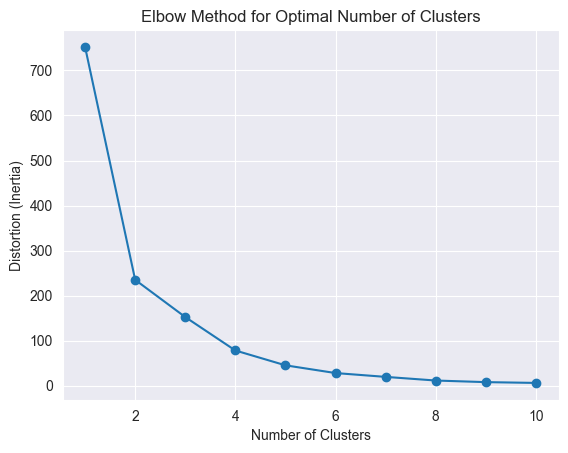

In [38]:
features_for_clustering = processed_user_data[['PCA1', 'PCA2', 'PCA3']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)
    
# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


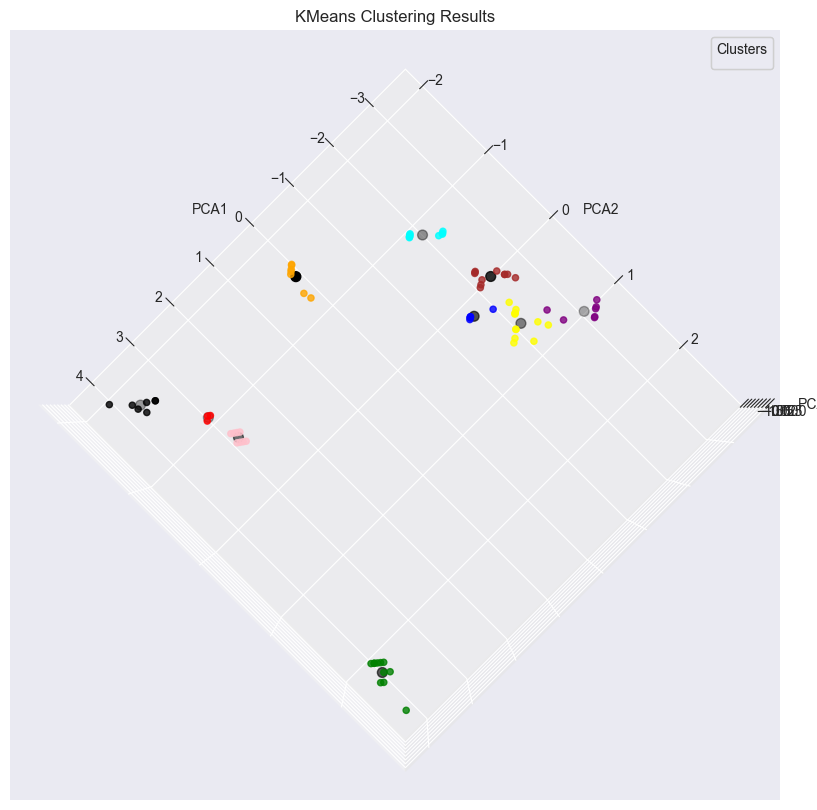

In [39]:

# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 10  # Choose the point where the distortion starts to decrease more slowly (the "elbow")

# Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
processed_user_data['cluster'] = kmeans.fit_predict(features_for_clustering)
centroids = kmeans.cluster_centers_


# Visualize the clustering results with a 3D scatter plot
cluster_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink','yellow','black']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='.', s=200, c='black', label='Centroids')

scatter = ax.scatter(processed_user_data['PCA1'], processed_user_data['PCA2'], processed_user_data['PCA3'], c=[cluster_colors[i] for i in processed_user_data['cluster']], alpha=0.8)
ax.set_title('KMeans Clustering Results')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

ax.view_init(elev=90, azim=45) 

In [40]:
processed_user_data

,_id,PCA1,PCA2,PCA3,cluster
0,65a713cc1dfebcf6ca173f0d,-2.111951,0.463287,-0.582534,8
1,65a714291dfebcf6ca173f0e,-2.033699,-0.129872,1.413553,6
2,65a714641dfebcf6ca173f0f,-1.787710,-0.915939,-0.656929,5
3,65a71f2e1dfebcf6ca173f12,0.028159,-1.477110,2.190309,3
4,65a723fd1dfebcf6ca173f15,-1.492842,0.153521,0.565217,1
...,...,...,...,...,...
77,65aa961b5cb4f5930d2b2580,-2.268723,-0.707854,-1.029713,5
78,65aa96245cb4f5930d2b2581,-1.775286,-0.910583,-0.686993,5
79,65aa96295cb4f5930d2b2582,-1.762861,-0.905227,-0.717056,5
80,65aa96325cb4f5930d2b2583,-2.231450,-0.691787,-1.119904,5


In [56]:
#  dictionary used to map each user to its corresponding cluster, allowing you to easily check the cluster assignment of a user given their ID.
user_cluster_mapping = dict(zip(processed_user_data['_id'], processed_user_data['cluster']))

# the cluster of the new data point to predict
target_cluster = 4

# filtering only the similar users of the new data point
target_cluster_users = processed_user_data[processed_user_data['cluster'] == target_cluster]['_id'].tolist()
target_cluster_users

['65a724811dfebcf6ca173f16',
 '65a9a27602478feb98fc38d3',
 '65a9c1bd02478feb98fc38fa',
 '65a9c1c902478feb98fc38fb',
 '65a9c1d202478feb98fc38fc',
 '65a9c1e202478feb98fc38fd',
 '65a9c1ef02478feb98fc38fe']

In [57]:
import pandas as pd

contract_record =load_raw_data("/Users/aya/Desktop/ML/insurance-recommender/data/raw/contract_record.csv")

filtered_contract_record = contract_record[contract_record['user_id'].isin(target_cluster_users)]

user_item_matrix = pd.pivot_table(filtered_contract_record, values='rating', index='user_id', columns='insurance_policy_id', fill_value=0)
print(user_item_matrix)

insurance_policy_id       65a725a01dfebcf6ca173f18  65a7d76ac6eac4ba334646b7
user_id                                                                     
65a724811dfebcf6ca173f16                       4.0                       5.0


In [64]:
import numpy as np

average_ratings = np.mean(user_item_matrix, axis=0)
average_ratings

insurance_policy_id
65a725a01dfebcf6ca173f18    4.0
65a7d76ac6eac4ba334646b7    5.0
dtype: float64

In [67]:
top3_recommendations = average_ratings.sort_values(ascending=False).head(3).index
top3_recommendations

Index(['65a7d76ac6eac4ba334646b7', '65a725a01dfebcf6ca173f18'], dtype='object', name='insurance_policy_id')